# A CGI Decoder

In [1]:
def cgi_decode(s: str) -> str:
    """Decode the CGI-encoded string `s`:
       * replace '+' by ' '
       * replace "%xx" by the character with hex number xx.
       Return the decoded string.  Raise `ValueError` for invalid inputs."""
    hex_values = {
        '0': 0, '1': 1, '2': 2, '3': 3, '4': 4, 
        '5': 5, '6': 6, '7': 7, '8': 8, '9': 9,
        'a': 10, 'b': 11, 'c': 12, 'd': 13, 'e': 14,
        'A': 10, 'B': 11, 'C': 12, 'D': 13, 'E': 14
    }

    t = ''
    i = 0
    while i < len(s):
        c = s[i]
        if c == '+':
            t += ' '
        elif c == '%':
            digit_high, digit_low = s[ i + 1], s[i + 2]
            i += 2
            if digit_high in hex_values and digit_low in hex_values:
                v = hex_values[digit_high] * 16 + hex_values[digit_low]
                t += chr(v)
            else:
                raise ValueError('Invalid Encoding')
        else:
            t += c
        i += 1
    return t

In [2]:
cgi_decode('Hello+world')

'Hello world'

In [3]:
assert cgi_decode('+') == ' '
assert cgi_decode('%20') == ' '
assert cgi_decode('abc') == 'abc'

try:
    cgi_decode('%?a')
    assert False
except ValueError:
    pass

# Tracing Executions

In [4]:
cgi_decode("a+b")

'a b'

In [5]:
from typing import Any, Optional, Callable
from types import FrameType, TracebackType

In [6]:
coverage = []

In [7]:
def traceit(frame: FrameType, event: str, arg: Any) -> Optional[Callable]:
    """Trace program execution. To be passed to sys.settrace()."""
    if event == 'line':
        global coverage
        function_name = frame.f_code.co_name
        lineno = frame.f_lineno
        coverage.append(lineno)

    return traceit

In [8]:
import sys

In [9]:
def cgi_decode_traced(s: str) -> None:
    global coverage
    coverage = []
    sys.settrace(traceit)  # Turn on
    cgi_decode(s)
    sys.settrace(None)    # Turn off

In [10]:
cgi_decode_traced("a+b")
print(coverage)

[6, 7, 6, 7, 6, 7, 6, 7, 6, 7, 6, 8, 6, 8, 6, 8, 6, 8, 6, 8, 6, 9, 6, 9, 6, 9, 6, 9, 6, 9, 6, 10, 6, 10, 6, 10, 6, 13, 14, 15, 16, 17, 19, 28, 29, 15, 16, 17, 18, 29, 15, 16, 17, 19, 28, 29, 15, 30]


In [11]:
import inspect

In [12]:
cgi_decode_code = inspect.getsource(cgi_decode)

In [13]:
print(cgi_decode_code)

def cgi_decode(s: str) -> str:
    """Decode the CGI-encoded string `s`:
       * replace '+' by ' '
       * replace "%xx" by the character with hex number xx.
       Return the decoded string.  Raise `ValueError` for invalid inputs."""
    hex_values = {
        '0': 0, '1': 1, '2': 2, '3': 3, '4': 4, 
        '5': 5, '6': 6, '7': 7, '8': 8, '9': 9,
        'a': 10, 'b': 11, 'c': 12, 'd': 13, 'e': 14,
        'A': 10, 'B': 11, 'C': 12, 'D': 13, 'E': 14
    }

    t = ''
    i = 0
    while i < len(s):
        c = s[i]
        if c == '+':
            t += ' '
        elif c == '%':
            digit_high, digit_low = s[ i + 1], s[i + 2]
            i += 2
            if digit_high in hex_values and digit_low in hex_values:
                v = hex_values[digit_high] * 16 + hex_values[digit_low]
                t += chr(v)
            else:
                raise ValueError('Invalid Encoding')
        else:
            t += c
        i += 1
    return t



In [14]:
cgi_decode_lines = [''] + cgi_decode_code.splitlines()

In [15]:
cgi_decode_lines[1]

'def cgi_decode(s: str) -> str:'

In [16]:
cgi_decode_lines[9:13]

["        'a': 10, 'b': 11, 'c': 12, 'd': 13, 'e': 14,",
 "        'A': 10, 'B': 11, 'C': 12, 'D': 13, 'E': 14",
 '    }',
 '']

In [17]:
covered_lines = set(coverage)
print(covered_lines)

{6, 7, 8, 9, 10, 13, 14, 15, 16, 17, 18, 19, 28, 29, 30}


In [18]:
for lineno in range(1, len(cgi_decode_lines)):
    if lineno not in covered_lines:
        print("# ", end="")
    else:
        print("  ", end="")
    print("%2d  " % lineno, end="")
    print(cgi_decode_lines[lineno])
    print()

#  1  def cgi_decode(s: str) -> str:

#  2      """Decode the CGI-encoded string `s`:

#  3         * replace '+' by ' '

#  4         * replace "%xx" by the character with hex number xx.

#  5         Return the decoded string.  Raise `ValueError` for invalid inputs."""

   6      hex_values = {

   7          '0': 0, '1': 1, '2': 2, '3': 3, '4': 4, 

   8          '5': 5, '6': 6, '7': 7, '8': 8, '9': 9,

   9          'a': 10, 'b': 11, 'c': 12, 'd': 13, 'e': 14,

  10          'A': 10, 'B': 11, 'C': 12, 'D': 13, 'E': 14

# 11      }

# 12  

  13      t = ''

  14      i = 0

  15      while i < len(s):

  16          c = s[i]

  17          if c == '+':

  18              t += ' '

  19          elif c == '%':

# 20              digit_high, digit_low = s[ i + 1], s[i + 2]

# 21              i += 2

# 22              if digit_high in hex_values and digit_low in hex_values:

# 23                  v = hex_values[digit_high] * 16 + hex_values[digit_low]

# 24                  t += chr(v

## A Coverage Class

In [19]:
from typing import List, Dict, Tuple, Union, Type, Set
Location = Tuple[str, int]

In [20]:
class Coverage:
    """Track coverage within a `with` block. Use as
    ```
    with Coverage() as cov:
        function_to_be_traced()
    c = cov.coverage()
    ```
    """
    def __init__(self) -> None:
        """Constructor"""
        self._trace: List[Location] = []

    # Trace function
    def traceit(self, frame: FrameType, event: str, arg: Any) -> Optional[Callable]:
        """Tracing function. To be overloaded in subclasses."""
        if self.original_trace_function is not None:
            self.original_trace_function(frame, event, arg)

        if event == "line":
            function_name = frame.f_code.co_name
            lineno = frame.f_lineno
            if function_name != '__exit__':  # avoid tracing ourselves:
                self._trace.append((function_name, lineno))

        return self.traceit

    def __enter__(self) -> Any:
        """Start of `with` block. Turn on tracing."""
        self.original_trace_function = sys.gettrace()
        sys.settrace(self.traceit)
        return self

    def __exit__(self, exc_type: Type, exc_value: BaseException,
                 tb: TracebackType) -> Optional[bool]:
        """End of `with` block. Turn off tracing."""
        sys.settrace(self.original_trace_function)
        return None  # default: pass all exceptions

    def trace(self) -> List[Location]:
        """The list of executed lines, as (function_name, line_number) pairs"""
        return self._trace

    def coverage(self) -> Set[Location]:
        """The set of executed lines, as (function_name, line_number) pairs"""
        return set(self.trace())

    def function_names(self) -> Set[str]:
        """The set of function names seen"""
        return set(function_name for (function_name, line_number) in self.coverage())

    def __repr__(self) -> str:
        """Return a string representation of this object.
           Show covered (and uncovered) program code"""
        t = ""
        for function_name in self.function_names():
            # Similar code as in the example above
            try:
                fun = eval(function_name)
            except Exception as exc:
                t += f"Skipping {function_name}: {exc}"
                continue

            source_lines, start_line_number = inspect.getsourcelines(fun)
            for lineno in range(start_line_number, start_line_number + len(source_lines)):
                if (function_name, lineno) not in self.trace():
                    t += "# "
                else:
                    t += "  "
                t += "%2d  " % lineno
                t += source_lines[lineno - start_line_number]

        return t

In [21]:
with Coverage() as cov:
    cgi_decode('a+b')

print(cov.coverage())

{('cgi_decode', 9), ('cgi_decode', 6), ('cgi_decode', 28), ('cgi_decode', 15), ('cgi_decode', 18), ('cgi_decode', 8), ('cgi_decode', 14), ('cgi_decode', 17), ('cgi_decode', 7), ('cgi_decode', 30), ('cgi_decode', 10), ('cgi_decode', 16), ('cgi_decode', 29), ('cgi_decode', 13), ('cgi_decode', 19)}


In [22]:
print(cov)

#  1  def cgi_decode(s: str) -> str:
#  2      """Decode the CGI-encoded string `s`:
#  3         * replace '+' by ' '
#  4         * replace "%xx" by the character with hex number xx.
#  5         Return the decoded string.  Raise `ValueError` for invalid inputs."""
   6      hex_values = {
   7          '0': 0, '1': 1, '2': 2, '3': 3, '4': 4, 
   8          '5': 5, '6': 6, '7': 7, '8': 8, '9': 9,
   9          'a': 10, 'b': 11, 'c': 12, 'd': 13, 'e': 14,
  10          'A': 10, 'B': 11, 'C': 12, 'D': 13, 'E': 14
# 11      }
# 12  
  13      t = ''
  14      i = 0
  15      while i < len(s):
  16          c = s[i]
  17          if c == '+':
  18              t += ' '
  19          elif c == '%':
# 20              digit_high, digit_low = s[ i + 1], s[i + 2]
# 21              i += 2
# 22              if digit_high in hex_values and digit_low in hex_values:
# 23                  v = hex_values[digit_high] * 16 + hex_values[digit_low]
# 24                  t += chr(v)
# 25              els

## Comparing Coverage

In [23]:
with Coverage() as cov_plus:
    cgi_decode("a+b")
with Coverage() as cov_standard:
    cgi_decode("abc")

cov_plus.coverage() - cov_standard.coverage()

{('cgi_decode', 18)}

In [25]:
with Coverage() as cov_max:
    cgi_decode('+')
    cgi_decode('%20')
    cgi_decode('abc')
    try:
        cgi_decode('%?a')
    except Exception:
        pass

In [26]:
cov_max.coverage() - cov_plus.coverage()

{('cgi_decode', 20),
 ('cgi_decode', 21),
 ('cgi_decode', 22),
 ('cgi_decode', 23),
 ('cgi_decode', 24),
 ('cgi_decode', 26)}

## Coverage of Basic Fuzzing

In [27]:
from ipynb.fs.full.fuzzer import fuzzer

In [28]:
sample = fuzzer()
sample

'(059*5.90)?3/!34?$)!-$*);>%8#5?&%*8:52>:*$#)&4(#0=11+/#--+/!&2,\'/1</">\'42#?&":=5)>:\'5+<:+9<4/%,+>%4('

In [29]:
with Coverage() as cov_fuzz:
    try:
        cgi_decode(sample)
    except:
        pass
cov_fuzz.coverage()

{('cgi_decode', 6),
 ('cgi_decode', 7),
 ('cgi_decode', 8),
 ('cgi_decode', 9),
 ('cgi_decode', 10),
 ('cgi_decode', 13),
 ('cgi_decode', 14),
 ('cgi_decode', 15),
 ('cgi_decode', 16),
 ('cgi_decode', 17),
 ('cgi_decode', 19),
 ('cgi_decode', 20),
 ('cgi_decode', 21),
 ('cgi_decode', 22),
 ('cgi_decode', 26),
 ('cgi_decode', 28),
 ('cgi_decode', 29)}

In [30]:
cov_max.coverage() - cov_fuzz.coverage()

{('cgi_decode', 18),
 ('cgi_decode', 23),
 ('cgi_decode', 24),
 ('cgi_decode', 30)}

In [41]:
trials = 100

In [32]:
def population_coverage(population: List[str], function: Callable) \
        -> Tuple[Set[Location], List[int]]:
    cumulative_coverage: List[int] = []
    all_coverage: Set[Location] = set()

    for s in population:
        with Coverage() as cov:
            try:
                function(s)
            except:
                pass
        all_coverage |= cov.coverage()
        cumulative_coverage.append(len(all_coverage))

    return all_coverage, cumulative_coverage

In [42]:
def hundred_inputs() -> List[str]:
    population = []
    for i in range(trials):
        population.append(fuzzer())
    return population

In [34]:
all_coverage, cumulative_coverage = \
    population_coverage(hundred_inputs(), cgi_decode)

In [36]:
%matplotlib inline

In [37]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'lines covered')

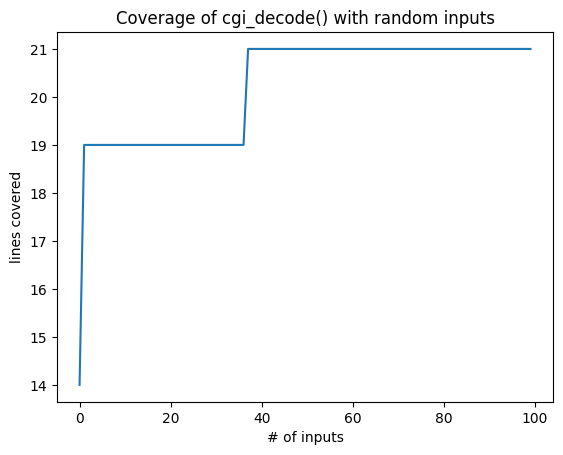

In [38]:
plt.plot(cumulative_coverage)
plt.title('Coverage of cgi_decode() with random inputs')
plt.xlabel('# of inputs')
plt.ylabel('lines covered')

In [43]:
runs = 100

# Create an array with TRIALS elements, all zero
sum_coverage = [0] * trials

for run in range(runs):
    all_coverage, coverage = population_coverage(hundred_inputs(), cgi_decode)
    assert len(coverage) == trials
    for i in range(trials):
        sum_coverage[i] += coverage[i]

average_coverage = []
for i in range(trials):
    average_coverage.append(sum_coverage[i] / runs)

Text(0, 0.5, 'lines covered')

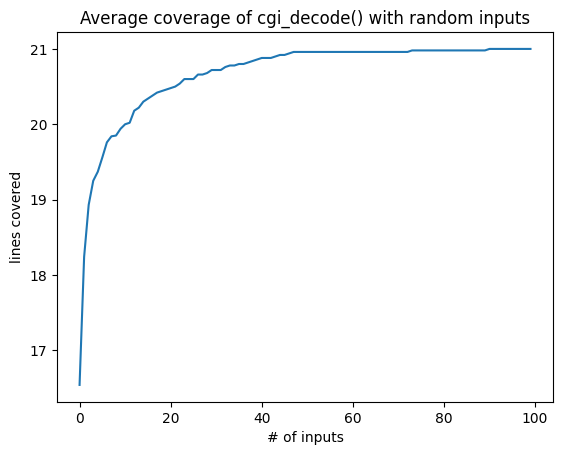

In [44]:
plt.plot(average_coverage)
plt.title('Average coverage of cgi_decode() with random inputs')
plt.xlabel('# of inputs')
plt.ylabel('lines covered')

## Getting Coveraga from External Programs

gcov